# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset from the UCI Machine Learning Repository represents 17 marketing campaigns conducted by a Portuguese banking institution between May 2008 and November 2010. The data includes 79,354 contacts made primarily through telephone calls, with occasional support from the Internet online banking channel. Each campaign was managed in an integrated fashion, and the results for all channels were combined.

During these campaigns, an attractive long-term deposit application with good interest rates was offered. For each contact, a large number of attributes were stored, and the target variable indicated whether there was a success. Out of the entire database, there were 6,499 successes, resulting in an 8% success rate.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
file_path = 'data/bank-additional-full.csv'
df = pd.read_csv(file_path, sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


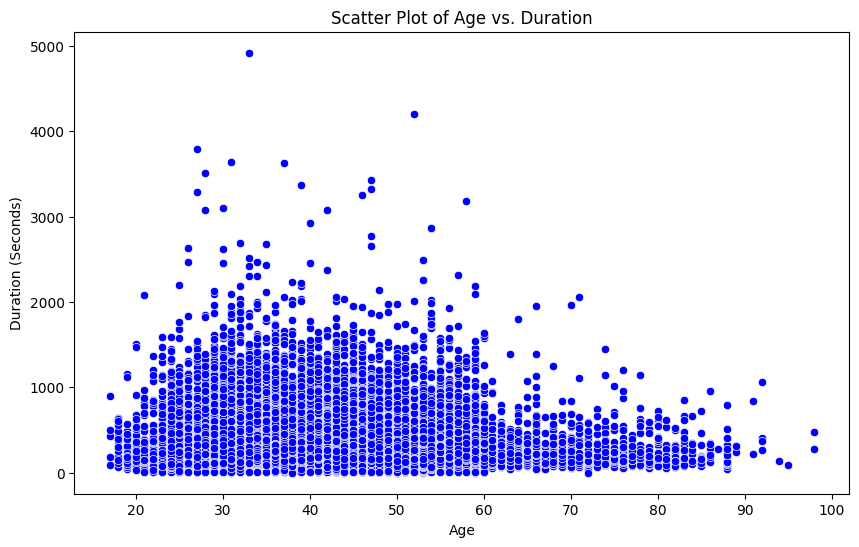

In [4]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration', color='blue')
plt.title('Scatter Plot of Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration (Seconds)')
plt.show()




Text(0, 0.5, 'Frequency')

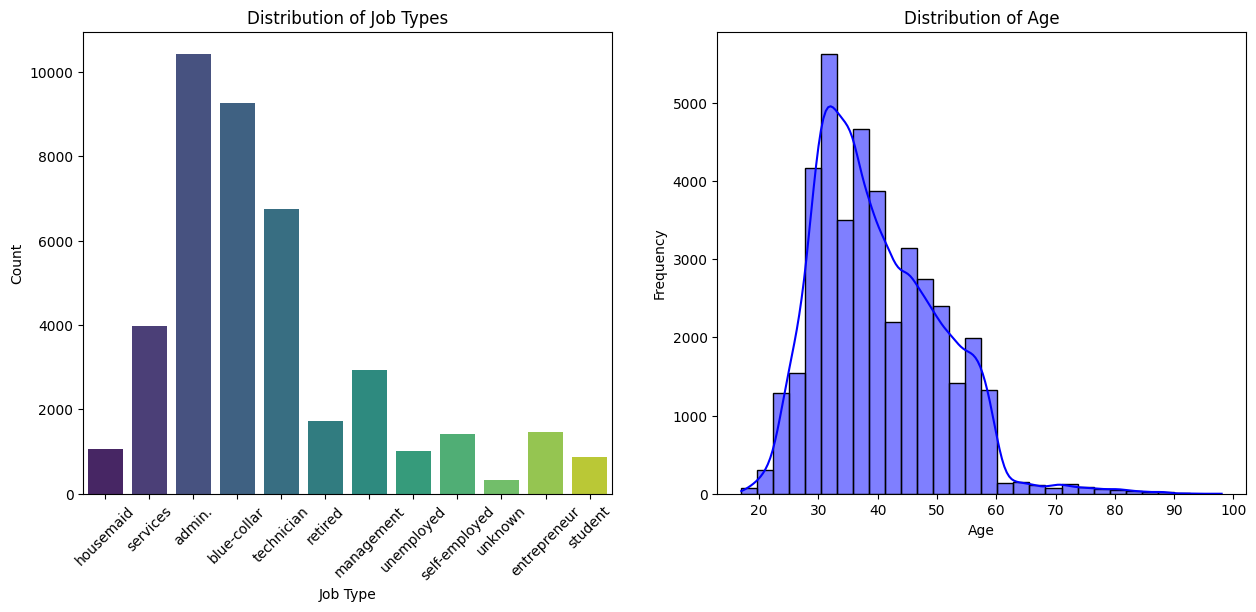

In [5]:


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for 'job'
sns.countplot(data=df, x='job', hue='job', palette='viridis', legend=False, ax=axes[0])
axes[0].set_title('Distribution of Job Types')
axes[0].set_xlabel('Job Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Histogram for 'age'
sns.histplot(data=df, x='age', bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')



### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



# **Missing Values**
There are no missing values in any of the columns.
# **Categorical Features:**
* Convert categorical features (e.g., job, marital, education, etc.) to numerical values using techniques like one-hot encoding or label encoding.
* 'Unknown' Values: Treat 'unknown' values as missing and decide on an imputation strategy.

In [6]:

# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)


Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data Types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y               

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

## **Business Objective**
The primary business objective of this task is to predict whether a client will subscribe to a term deposit based on the data collected from various marketing campaigns conducted by a Portuguese banking institution. By accurately predicting client behavior, the bank aims to:

1. **Optimize Marketing Strategies:** Improve the effectiveness of future marketing campaigns by targeting clients who are more likely to subscribe to term deposits.
2. **Increase Subscription Rates:** Enhance the overall subscription rate for term deposits, thereby increasing the bank's revenue and customer base.
3. **Resource Allocation:** Efficiently allocate resources, such as time and effort, towards clients with a higher probability of subscribing, reducing unnecessary costs.
4. **Customer Insights:** Gain deeper insights into customer preferences and behaviors, enabling personalized marketing approaches and better customer relationship management.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [8]:

# Select bank client data features and target column
features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
target = df['y']

# Encode categorical features using OneHotEncoder
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(features[categorical_features])


In [9]:

# Convert encoded features to DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded features with numeric features
numeric_features = features[['age']]
prepared_features = pd.concat([numeric_features.reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

# Encode target column using LabelEncoder
label_encoder = LabelEncoder()
prepared_target = label_encoder.fit_transform(target)


In [10]:

# Display the prepared features and target column
print("Prepared Features:\n", prepared_features.head())
print("\nPrepared Target:\n", prepared_target[:5])


Prepared Features:
    age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   56         0.0              0.0               0.0            1.0   
1   57         0.0              0.0               0.0            0.0   
2   37         0.0              0.0               0.0            0.0   
3   40         1.0              0.0               0.0            0.0   
4   56         0.0              0.0               0.0            0.0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0             0.0          0.0                0.0           0.0          0.0   
1             0.0          0.0                0.0           1.0          0.0   
2             0.0          0.0                0.0           1.0          0.0   
3             0.0          0.0                0.0           0.0          0.0   
4             0.0          0.0                0.0           1.0          0.0   

   ...  education_unknown  default_no  default_unknown  default_ye

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:

from sklearn.model_selection import train_test_split


In [12]:


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(prepared_features, prepared_target, test_size=0.2, random_state=42)


In [13]:

# Display the shapes of the train and test sets
print("Train Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Train Target Shape:", y_train.shape)
print("Test Target Shape:", y_test.shape)


Train Features Shape: (32950, 34)
Test Features Shape: (8238, 34)
Train Target Shape: (32950,)
Test Target Shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


In [15]:

# Establish a baseline performance using DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)


In [16]:

# Calculate accuracy of the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_dummy)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


Baseline Accuracy: 0.8865


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:

from sklearn.linear_model import LogisticRegression
# Build and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

# Calculate accuracy of the Logistic Regression model
logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic_regression)

print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.4f}")


Logistic Regression Accuracy: 0.8865


### Problem 9: Score the Model

What is the accuracy of your model?

he accuracy of the Logistic Regression model is 88.65%.

In [18]:
print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.4f}")

Logistic Regression Accuracy: 0.8865


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time



In [20]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}


In [21]:

# Fit and score each model, and record fit time
results = []
for model_name, model in models.items():
  start_time = time.time()
  model.fit(X_train, y_train)
  fit_time = time.time() - start_time

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  results.append({
      "Model": model_name,
      "Accuracy": accuracy,
      "Fit Time (seconds)": fit_time
      })

# Create a DataFrame to present the findings
results_df = pd.DataFrame(results)

print(results_df)


                 Model  Accuracy  Fit Time (seconds)
0  Logistic Regression  0.886502            0.344973
1                  KNN  0.873513            0.007278
2                  SVM  0.886502           16.495353


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## 1. **Feature Engineering and Exploration**
* **Gender Feature:** The dataset does not include a gender feature. However, if it did, we would need to consider whether it adds predictive value. Gender might influence certain behaviors, but it could also introduce bias. It's essential to evaluate its impact on model performance and fairness.

* **Other Features:** We can explore additional features such as interaction terms, polynomial features, or domain-specific transformations. For example, combining age with job to create a new feature that captures age-specific job trends.

##2. **Hyperparameter Tuning and Grid Search**
Hyperparameter tuning can significantly improve model performance. Here are some examples:
* **KNN:** Number of neighbors (n_neighbors).
* **Decision Tree:** Maximum depth (max_depth), minimum samples split (min_samples_split).
* **SVM:** Regularization parameter (C), kernel type (kernel).
We can use GridSearchCV to systematically explore different hyperparameter combinations and select the best ones

##3. **Adjusting Performance Metric**
* **F1 Score:** Combines precision and recall, useful for imbalanced datasets.
* **Precision and Recall:** Evaluate the model's ability to correctly identify positive cases.

In [22]:



# Initialize models with hyperparameter tuning using GridSearchCV
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10]},
    "KNN": {'n_neighbors': [3, 5, 7]},
    "Decision Tree": {'max_depth': [None, 10, 20]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

results = []
for model_name, model in models.items():
  grid_search = GridSearchCV(model, param_grids[model_name], cv=5)

  start_time = time.time()
  grid_search.fit(X_train, y_train)
  fit_time = time.time() - start_time

  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  results.append({
      "Model": model_name,
      "Best Parameters": grid_search.best_params_,
      "Accuracy": accuracy,
      "F1 Score": f1,
      "Fit Time (seconds)": fit_time
      })


In [ ]:

results_df = pd.DataFrame(results)

print(results_df)


# **Findings with Actionable Items**
#### **Findings:**

* **Age Distribution:** Most clients are between 30 and 60 years old.
* **Job Type:** The majority of clients are in administrative, blue-collar, and technician roles.
* **Marital Status:** Most clients are married.
* **Education Level:** A significant portion of clients have a university degree or high school education.
* **Loan Status:** Many clients have housing loans, but fewer have personal loans.

#### **Actionable Items:**

* **Target Younger Clients:** Marketing campaigns could focus more on younger clients who might be more open to new financial products.
* **Job-Specific Campaigns:** Tailor marketing messages to specific job types, emphasizing benefits relevant to their financial situation.
* **Marital Status:** Develop campaigns that address the financial needs of married clients, such as joint accounts or family savings plans.
* **Education-Based Messaging:** Highlight the benefits of term deposits in a way that resonates with clients' educational backgrounds.
* **Loan Offers:** Consider offering bundled products that include term deposits and loan options.